In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

# Set a new working directory
new_path = '../'
os.chdir(new_path)

In [3]:
from morphomics import protocols, utils
import tomli

# Path to the toml file. Contains the parameters for each protocol
parameters_filepath = "examples/Parameter_files/Morphomics.Parameters_trial.toml"

# read the toml file
with open(parameters_filepath, mode="rb") as _parameter_file:
    parameters = tomli.load(_parameter_file)

# get the protocol
# from already saved protocol
# or initialize a new protocol with parameters
if parameters["load_previous_instance"]:
    last_instance_path = os.path.join(parameters["path_to_last_instance"], f'last_instance_{parameters["Parameters_ID"]}')
    protocol = utils.load_obj(last_instance_path)
else:
    protocol = protocols.Protocols(parameters, parameters["Parameters_ID"])

script_sequence = parameters["Protocols"]
print(script_sequence)

Unless you have specified the file prefix in the succeeding executables, 
this will be the file prefix: Morphomics.PID_trial
['Input', 'Clean_frame', 'Bootstrap', 'Persistence_Images', 'UMAP', 'Prepare_ReductionInfo', 'Plotting']


In [4]:
# input
perform_input = getattr(protocol, 'Input')
perform_input()

Loading the data from examples/data
Saving dataset in examples/trial_folder/tmd/Morphomics.PID_trial.TMD-radial_distances
You are now loading the 3D reconstructions (.swc files) from this folder: 
examples/data

Sample filenames:
examples/data/S1/3xKXA/M/BL6_M_KXA1.5W_IBA488_WFA568_CD68647_DAPI_S1_2/Filament_001_Filaments_1_Trace_0032_nl_corrected.swc
examples/data/S1/3xKXA/M/BL6_M_KXA1.5W_IBA488_WFA568_CD68647_DAPI_S1_2/Filament_001_Filaments_1_Trace_0001_nl_corrected.swc
examples/data/S1/3xKXA/M/BL6_M_KXA1.5W_IBA488_WFA568_CD68647_DAPI_S1_2/Filament_001_Filaments_1_Trace_0048_nl_corrected.swc
examples/data/S1/3xKXA/M/BL6_M_KXA1.5W_IBA488_WFA568_CD68647_DAPI_S1_2/Filament_001_Filaments_1_Trace_0019_nl_corrected.swc
examples/data/S1/3xKXA/M/BL6_M_KXA1.5W_IBA488_WFA568_CD68647_DAPI_S1_2/Filament_001_Filaments_1_Trace_0034_nl_corrected.swc
 
[['S1' '3xKXA' 'M' 'BL6_M_KXA1.5W_IBA488_WFA568_CD68647_DAPI_S1_2'
  'Filament_001_Filaments_1_Trace_0032_nl_corrected.swc']
 ['S1' '3xKXA' 'M' 'BL6

In [5]:
tmd_microglia = protocol.morphoframe['TMD']
print(tmd_microglia.shape)

(1182, 8)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Persistence barcode'}, xlabel='Lifetime: radial distance', ylabel='Y'>)

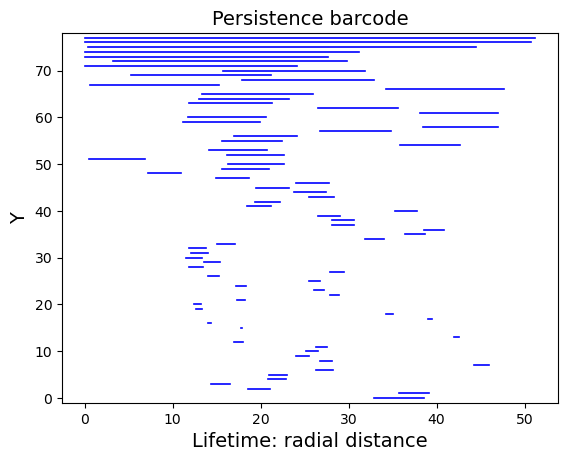

In [6]:
from tmd.view import plot
sample = tmd_microglia['barcodes'][0]
plot.barcode(sample)

In [7]:
# clean frame
perform_input = getattr(protocol, 'Clean_frame')
perform_input()

Removing morphologies with barcode size less than 5.00...
Replacing all instances of `['Saline_4h', 'Saline_48h']` in the `Model` morphoframe column with Adult
Clean done!


In [8]:
# load cleaned input

parameters['Protocols'].append('Load_data')
parameters['Load_data'] = {'folderpath_to_data': 'examples/trial_folder/tmd_cleaned/Morphomics.PID_trial.Cleaned',
                           'morphoframe_name': 'TMD'}# 
perform_input = getattr(protocol, 'Load_data')
perform_input()

In [9]:
df = protocol.morphoframe['TMD']

In [10]:
protocol.morphoframe.keys()

dict_keys(['TMD'])

In [11]:
parameters['Protocols'].append('Vectorizations')
parameters['Vectorizations'] = {'morphoframe_filepath' : 0,
                                'morphoframe_name' : "TMD",
                                'vect_method_parameters': {#'persistence_image': { "rescale_lims" : False,
                                #                                                     "xlims" : None,
                                #                                                     "ylims" : None,
                                #                                                     "bw_method" : 0.5,
                                #                                                     "barcode_weight" : None,
                                #                                                     "norm_method" : "sum",
                                #                                                     "resolution" : 20
                                #                                                 },
                                                            'lifespan_curve': { "rescale_lims" : False,
                                                                                    "xlims" : None,
                                                                                    "norm_method" : "id",
                                                                                    "resolution" : 50
                                                                                },
                                                            'betti_curve': { "rescale_lims" : False,
                                                                                    "xlims" : None,
                                                                                    "norm_method" : "id",
                                                                                    "resolution" : 50
                                                                                },
                                                            'life_entropy_curve' : { "rescale_lims" : False,
                                                                                    "xlims" : None,
                                                                                    "norm_method" : "id",
                                                                                    "resolution" : 50
                                                                                }

                                                         },
                                'save_data' : True,
                                'save_folder' : "examples/trial_folder/vectors",
                                'file_prefix' : 0
                                }
perform_vectorization = getattr(protocol, 'Vectorizations')
perform_vectorization()

Computes lsc_bc_lec and concatenates the vectors
Computing lifespan curves...
lsc done! 

Computing betti curves...
bc done! 

Computing life entropy curves...
lec done! 

Vectorization done!


In [12]:
parameters['Protocols'].append('Embedding')
parameters['Embedding'] = {'morphoframe_filepath' : 0,
                           'morphoframe_name' : "TMD",
                           'vectors_to_embed' : 'lsc_bc_lec',
                           'filter_pixels' : False,
                           'normalize' : True,
                            'embed_method_parameters' : { 'pca' : {'n_components' : 3,
                                                                   'svd_solver' : True,
                                                                  'pca_version' : 'normal',
                                                                   },
                                                        
                                                    #    'umap' : {'n_components' : 3,
                                                     #             'n_neighbors' : 20,
                                                      #            'min_dist': 0.1,
                                                       #           'spread' : 3.,
                                                        #          'random_state' : 10,
                                                         #         'metric' : "manhattan",
                                                          #        'densmap' : False,
                                                           #       }
                               
                                                        },
                            'save_data' : True,
                            'save_folder' : "examples/trial_folder/embeddings",
                            'file_prefix' : 0
                           }
perform_embedding = getattr(protocol, 'Embedding')
perform_embedding()

Normalize the vectors
Embeds the vectors with the following techniques pca 
Running PCA...
Embedding done!


In [14]:
parameters['Protocols'].append('Prepare_ReductionInfo')
parameters['Prepare_ReductionInfo'] = {'morphoframe_filepath' : 0,
                                       'morphoframe_name' : 'TMD',
                                       'coordinate_key' : "pca",
                                       'coordinate_axisnames' : "pca_2",
                                       'save_folder' : "examples/trial_folder/reduction",
                                       'save_data' : True,
                                       'file_prefix' : 0 
                                        }
perform_embedding = getattr(protocol, 'Prepare_ReductionInfo')
perform_embedding()

Preparing .csv file that can be loaded into the morphOMICs dashboard...


IndexError: tuple index out of range

In [13]:
protocol.morphoframe['TMD'].Model

0          3xKXA
1          3xKXA
2          3xKXA
3          3xKXA
4          3xKXA
          ...   
1170    3xSaline
1171    3xSaline
1172    3xSaline
1173    3xSaline
1174    3xSaline
Name: Model, Length: 1175, dtype: object

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px

df = protocol.morphoframe['TMD']

# Mapping colors to models
color_map = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'orange'}
df['color'] = df['Model'].map(color_map)

# Unpacking 3D vectors
df[['x', 'y', 'z']] = pd.DataFrame(df['pca'].tolist(), index=df.index)

# Plotting with Plotly
fig = px.scatter_3d(df, x='x', y='y', z='z', color='Model', color_discrete_map=color_map,
                    opacity=1, size_max=10)
fig.update_traces(marker=dict(size=3))
# Update layout for better viewing
fig.update_layout(
    title='3D Scatter Plot with Color by Model',
    scene=dict(
        xaxis=dict(title='PCA1'),
        yaxis=dict(title='PCA2'),
        zaxis=dict(title='PCA3')
    )
)

fig.show()

In [24]:
# bootstrap
parameters["Bootstrap"]["morphoframe_name"] = "TMD"
parameters["Bootstrap"]["feature_to_bootstrap"] = ["barcodes", "bars"] 
perform_input = getattr(protocol, 'Bootstrap')
perform_input()

Bootstrapping with the following parameters: 
bootstrap resolution: Region-Model-Sex
bootstrap size: 15
number of bootstraps: 500
Performing bootstrapping for S1_3xKXA_M...
There are 136 morphologies to bootstrap...
Performing subsampling by random selection...
...done! 

Performing bootstrapping for S1_3xKXA_F...
There are 152 morphologies to bootstrap...
Performing subsampling by random selection...
...done! 

Performing bootstrapping for S1_1xKXA_M...
There are 211 morphologies to bootstrap...
Performing subsampling by random selection...
...done! 

Performing bootstrapping for S1_1xKXA_F...
There are 160 morphologies to bootstrap...
Performing subsampling by random selection...
...done! 

Performing bootstrapping for S1_2xKXA_M...
There are 159 morphologies to bootstrap...
Performing subsampling by random selection...
...done! 

Performing bootstrapping for S1_2xKXA_F...
There are 136 morphologies to bootstrap...
Performing subsampling by random selection...
...done! 

Performing b

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Persistence barcode'}, xlabel='Lifetime: radial distance', ylabel='Y'>)

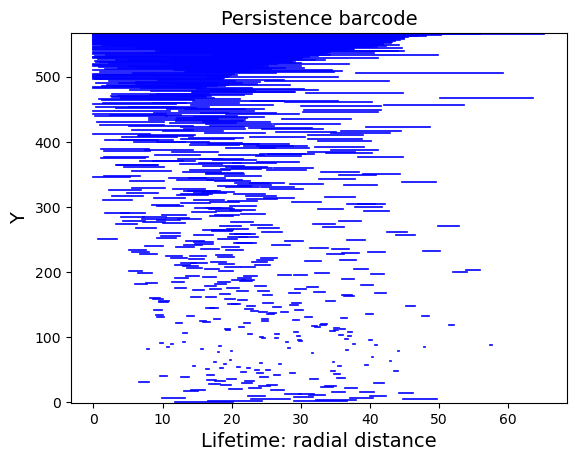

In [30]:
barcode_example = protocol.morphoframe['bootstrap_frame']['barcodes'][0]
plot.barcode(barcode_example)

In [39]:
protocol.morphoframe["TMD"].keys()

Index(['Region', 'Model', 'Sex', 'Animal', '_file_name', 'path_to_file',
       'tree', 'barcodes', 'Barcode_length', 'lsc_bc_lec', 'pca', 'color', 'x',
       'y', 'z'],
      dtype='object')

In [36]:
parameters["Prepare_ReductionInfo"]["coordinate_key"] = ''
perform_input = getattr(protocol, 'Prepare_ReductionInfo')
perform_input()

Preparing .csv file that can be loaded into the morphOMICs dashboard...


KeyError: 'X_umap'